<a href="https://colab.research.google.com/github/LucasMeirellesS/Ropositorio_Pred1/blob/main/Case4_DNC_Definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando bibliotecas para a criação de gráficos
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
#Importando bibliotecas que serão utilizadas na análise de dados e na criação do modelo.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# <h1>Iniciando análise descritiva de dados<h1>


*   Importando base de dados
*   Observando as 5 primeiras linhas para entender como os dados estão organizados na tabela com o método .head()
*   Observando o tamanho dos dados
*   Observando as informações da tabela para descobrir se existem valores nulos
*   Observando os parêmetros estatísticos com o método .describe(), além de gerar gráficos do tipo boxplot para analisar a distribuição de valores do dataset e valores discrepantes











In [ ]:
# Importando base de dados
marketing_bd = pd.read_csv("MKT.csv")

In [ ]:
# Observando as 5 primeiras linhas para verificar a base da dados
marketing_bd.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Chamando a função shape para observar o tamanho da base
marketing_bd.shape

(171, 4)

Os dados acima estão organizados numa tabela de 171 linhas e 4 colunas

In [ ]:
# Buscando informações da tabela
marketing_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Com a análise das informações acima, podemos observar que não existem dados nulos, nos é mostrado novamente o número de linhas e colunas e que os dados de todas as colunas são do tipo float.

In [ ]:
# Chamando a função .describe() para verificar a distribuição e a discrepancia dos dados
marketing_bd.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# Criando um boxplot para cada coluna para uma análise gráfica dos dados mostrados na tabela do .describe():

In [ ]:
fig = px.box(marketing_bd, x= "youtube")
fig.update_traces(line_color="red")

In [ ]:
fig = px.box(marketing_bd, x= "facebook")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(marketing_bd, x= "newspaper")
fig.update_traces(line_color="gray")

In [ ]:
fig = px.box(marketing_bd, x= "sales")
fig.update_traces(line_color="green")

In [ ]:
marketing_bd.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

# Análise exploratória
*   Utilizando um pairplot para observar a correlação entre os dados com Seaborn
*   Mostrando a correlação dos dados com o método .corr() em número
*   Utilizando um heatmap para mostrar de uma forma mais gráfica o valor da correlação







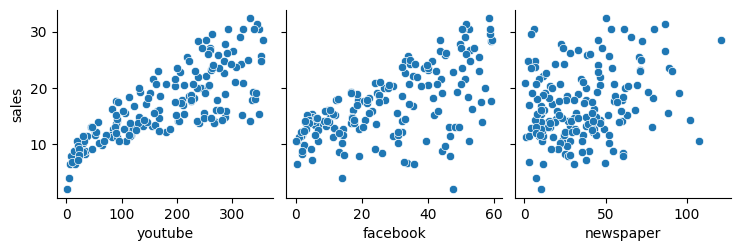

In [ ]:
sns.pairplot(marketing_bd, x_vars = ['youtube', 'facebook', 'newspaper'], y_vars = "sales")

## Com base nos gráficos acima, observa-se, inicialmente, uma correlação linear mais forte entre vendas e youtube e vendas e facebook.


In [ ]:
marketing_bd.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

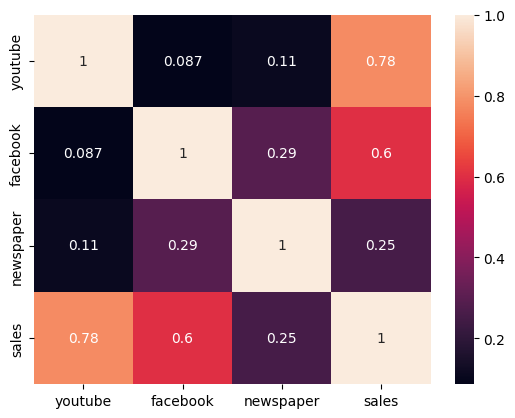

In [ ]:
sns.heatmap(marketing_bd.corr(), annot=True )

# Como mostrado nos gráficos anteriores, aqui comprova-se que a correlação entre o investimento de marketing no Youtube é bem maior em relação à vendas que facebook e newspapper com cerca de 78%, 18% maior que a correlação entre facebook e vendas que é em torno de 60%. Já a correlação entre newspapper e vendas é bem baixa, com 25%.


#

In [ ]:
marketing_bd.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
x = marketing_bd[['youtube', 'facebook', 'newspaper']]
y = marketing_bd[['sales']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 20)

In [ ]:
print(x_test.shape)

(52, 3)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predito = lm.predict(x_test)

# Calculando o R^2 e mostrando na tela.

In [ ]:
r = r2_score(y_test, y_predito)
print(f"R Quadrado: {r}")

R Quadrado: 0.9212837905574032


#Análise preditiva do modelo de acordo com dados inseridos

In [ ]:

youtube = float(input("Digite um valor de investimento para youtube para realizar a previsão: "))
facebook = float(input("Digite um valor de investimento para facebook para realizar a previsão: "))
newspaper = float(input("Digite um valor de investimento para newspaper para realizar a previsão: "))

vendas = [[youtube, facebook, newspaper]]
lm.predict(vendas)[0]

Digite um valor de investimento para youtube para realizar a previsão: 75
Digite um valor de investimento para facebook para realizar a previsão: 32
Digite um valor de investimento para newspaper para realizar a previsão: 40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([13.04744003])

# Plotando gráfico para observar o nível acertividade do modelo

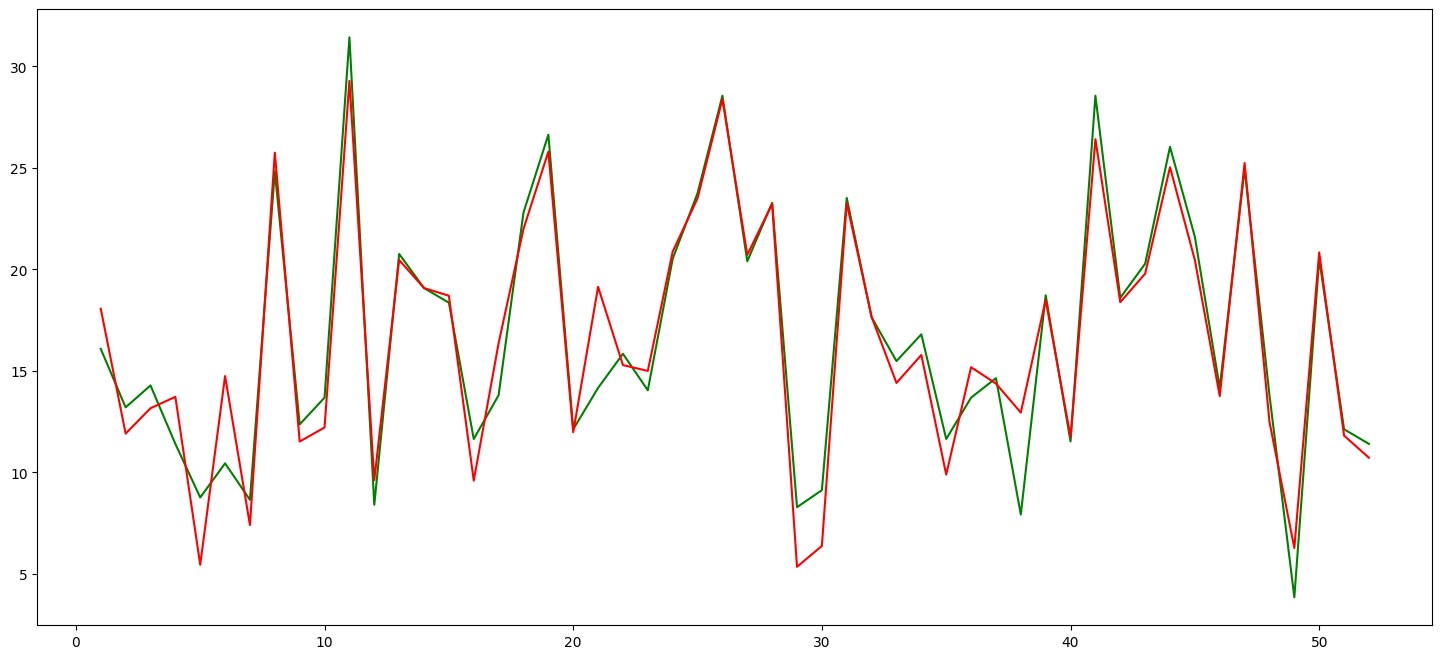

In [ ]:
idx = [i for i in range(1, 53)]
fig = plt.figure(figsize = (18, 8))
plt.plot(idx, y_test, color="green")
plt.plot(idx, y_predito, color="red")
